#**Introduction to PyTorch: From Linear Regression to Two-Layer Neural Network**

In [18]:
import numpy as np
import torch
import sklearn.datasets 
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [26]:
# Create tensors
a = torch.tensor(5, dtype = torch.long)
b = torch.tensor(5, dtype = torch.int32)
b.dtype

torch.int32

In [27]:
c = torch.ones(6)
print(c, c.dtype)

tensor([1., 1., 1., 1., 1., 1.]) torch.float32


In [28]:
# Shape
c.size() #x.shape

torch.Size([6])

In [29]:
# Broadcasting 
d = c + 1
print(d)

tensor([2., 2., 2., 2., 2., 2.])


In [30]:
# Change type
b.float()
b.dtype

torch.int32

In [31]:
# Reshape tensors
c.view(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [32]:
# Squeeze/Unsqueeze
c.unsqueeze(dim=0).shape

torch.Size([1, 6])

In [33]:
# Dot product VS matrix multiplication

In [34]:
d.dot(c) #torch.matmul(d.T,c)

tensor(12.)

## Download data
Description of the dataset https://scikit-learn.org/stable/datasets/toy_dataset.html

In [35]:
boston = sklearn.datasets.load_boston()

In [36]:
x1 = boston.data[:,-1]
y1 = boston.target

Q1. Create tensors $x$ and $y$ from $x1$ and $y1$ of type float

In [37]:
x = torch.tensor(x1, dtype=torch.float)
y = torch.tensor(y1, dtype=torch.float)
x = x/x.max()

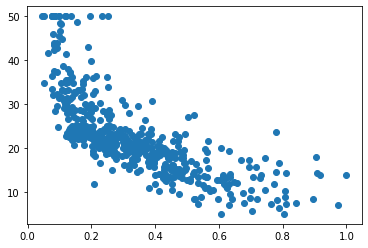

In [38]:
plt.scatter(x, y);

## Linear Regression Model: 
$$\hat{y} = wx+b$$
$$L(w,\ b) =\frac{1}{N} \sum_{i=1}^{N} \left(\hat{y}_i - y_i\right)^2 \to \min$$


## Gradient Descend:
1. Take $w^{old}=w_0$ and $b^{old}=b_0,$ and learning rate $0<\alpha<1.$

2. Update $$w^{new} = w^{old} - \alpha\frac{\partial L}{\partial w},$$ $$b^{new} = b^{old} - \alpha\frac{\partial L}{\partial b}.$$

Q2. Show that 
$$\frac{\partial L}{\partial w} = \frac{2}{N}\sum_{i=1}^{N} x_i \left(\hat{y}_i - y_i\right)$$
$$\frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}  \left(\hat{y}_i - y_i\right)$$

Q3. Initialize $w_0$ and $b_0$ using function torch.rand(n) $n$ - number of samples.



In [103]:
torch.manual_seed(0)
w_0 = torch.rand(1)
b_0 = torch.rand(1)

w_old = w_0
b_old = b_0

Q4. Implement Gradient Descent. For the sum you can use method tensor.mean().

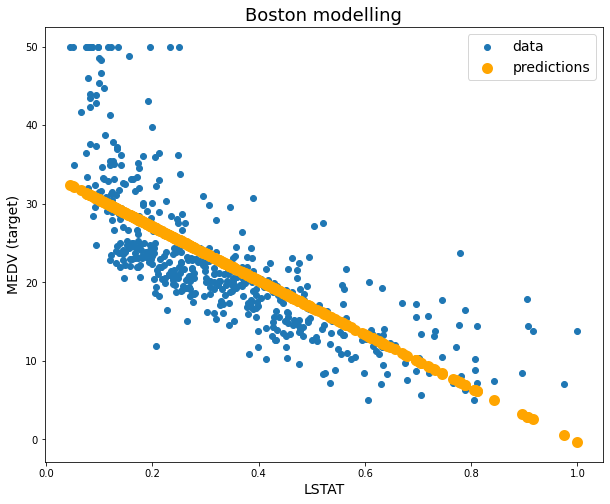

In [104]:

alpha = 0.5
for i in range(100):
  y_pred = w_old*x+b_old  # prediction
  dw = 2*torch.mean(x*(y_pred-y))
  db = 2*torch.mean((y_pred-y))
  
  w_new = w_old - alpha*dw
  b_new = b_old - alpha*db
  w_old = w_new
  b_old = b_new

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, label="data")
    plt.scatter(x, y_pred, color="orange", linewidth=5, label="predictions")
    plt.xlabel("LSTAT", fontsize=14)
    plt.ylabel("MEDV (target)", fontsize=14)
    plt.title("Boston modelling", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

## Automatic Differentiation
tensor.data, tensor.grad, tensor.grad_fn
## Detaching variables

In [47]:
a = torch.rand(1, requires_grad=True)
b = torch.sin(a)

Q5.Use method tensor.backward for b and print the derivative of b with respect to a (a.grad).

In [48]:
b.backward()
print(a.grad, torch.cos(a.data))

tensor([0.9961]) tensor([0.9961])


## In this section, we use atomatic differentiation for the Gradient Descend

In [49]:
w = w_0.clone().detach().requires_grad_(True) 
b = b_0.clone().detach().requires_grad_(True) 

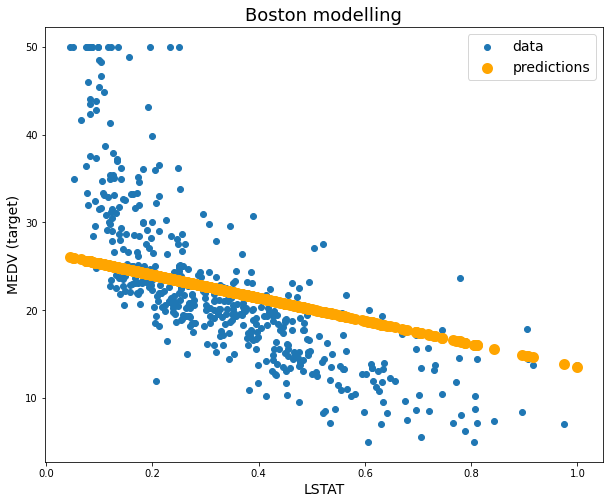

In [50]:
alpha = 0.1
for i in range(100):
  y_p = w*x+b
  loss = torch.mean((y_p-y)**2)
  loss.backward()
  w.data = w.data - alpha*w.grad
  b.data = b.data - alpha*b.grad
  w.grad.data.zero_()
  b.grad.data.zero_()

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, label="data")
    plt.scatter(x, y_p.data.numpy(), color="orange", linewidth=5, label="predictions")
    plt.xlabel("LSTAT", fontsize=14)
    plt.ylabel("MEDV (target)", fontsize=14)
    plt.title("Boston modelling", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

## Stochastic Gradient Discent
Our loss function 
$$L(w,\ b) =\frac{1}{N} \sum_{i=1}^{N} \left(\hat{y}_i - y_i\right)^2 = \frac{1}{N} \sum_{i=1}^{N} L^{<i>}(w,\ b).$$ 
Instead of calculating $\nabla L,$ we can choose randomly $i$ and do the update step
$$w^{new} = w^{old} - \alpha\frac{\partial L^{<i>}}{\partial w},$$ $$b^{new} = b^{old} - \alpha\frac{\partial L^{<i>}}{\partial b}.$$

The other option is to split the data into batches of size $M$ and optimize on each step
$$ \frac{1}{M} \sum_{i=1}^{M} L^{<i>}.$$

## Two-Layer Neural Network

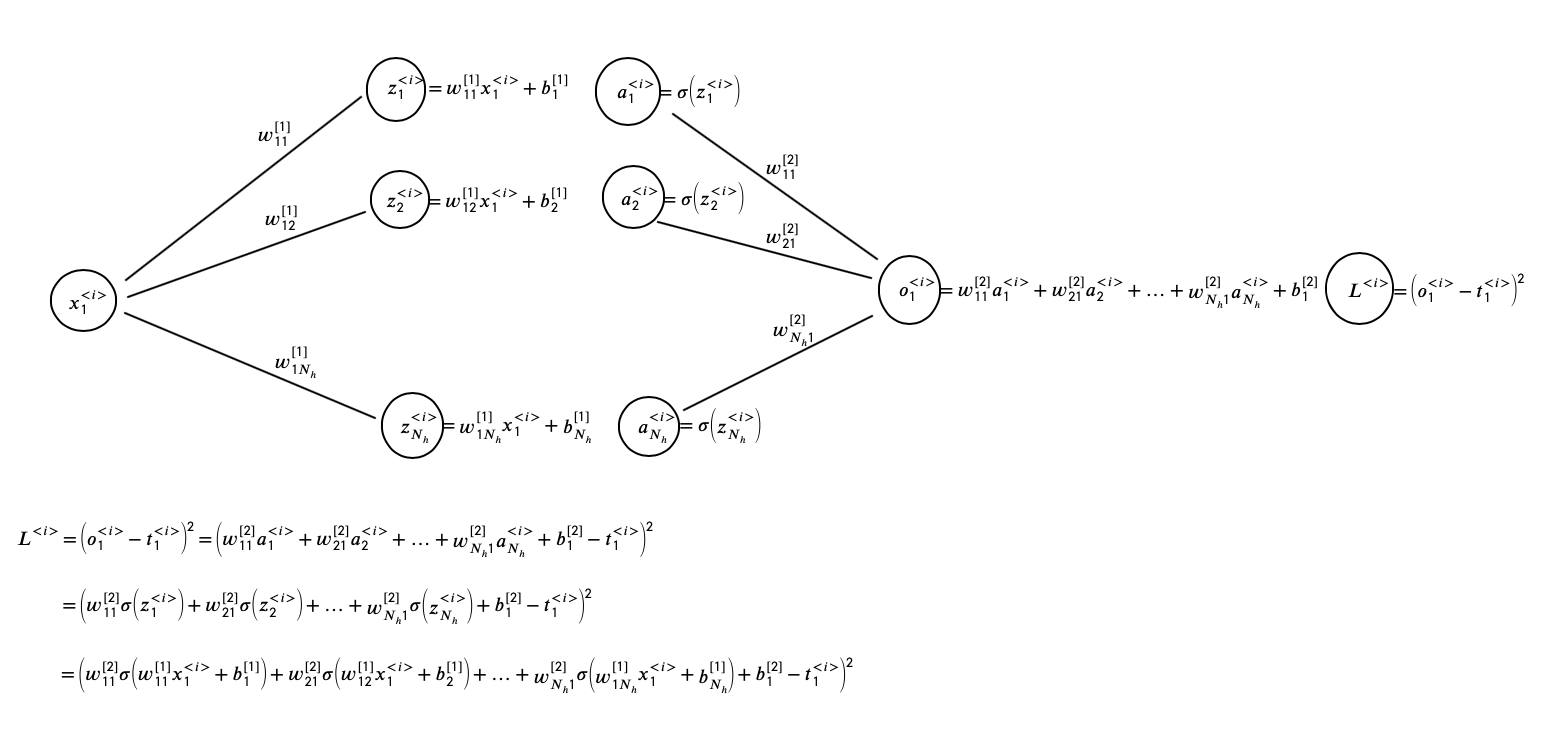
[See picture here](https://drive.google.com/uc?id=1G5jbja8oBaJ3Tsofk6cqYLQNRQbPQ4a5)

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

Q6. Proove that $$\sigma'(x) = \sigma(x)(1-\sigma(x)),$$
where $$\sigma(x) = \frac{1}{1+e^{-x}}.$$

$x$ - input layer (don't count) 

$z = W^{[1]}x+b^{[1]}$ - hidden layer (Layer 1)

$a = \sigma(z)$ - nonlinear activation of the hidden layer

$o = W^{[2]}a+b^{[2]}$ - output (Layer 2) 

$L = (o-t)^2$ - loss function



$a_1 = \sigma\left( w_{11}^{[1]}x + b_1^{[1]}\right),$ $a_2 = \sigma\left( w_{12}^{[1]}x + b_2^{[1]}\right)$

$$W^{[1]} = \begin{pmatrix} w^{[1]}_{11}\\ w^{[1]}_{12}\\ \vdots\\ w^{[1]}_{1N_h}\end{pmatrix},\qquad b^{[1]}=\begin{pmatrix} b^{[1]}_{1}\\ b^{[1]}_{2}\\ \vdots\\ b^{[1]}_{N_h}\end{pmatrix}$$

$$W^{[2]} = \begin{pmatrix} w^{[2]}_{11} & w^{[2]}_{21} & \ldots & w^{[2]}_{N_h 1}\end{pmatrix},\qquad b^{[2]}=\begin{pmatrix} b^{[2]}_{1}\end{pmatrix}$$

\begin{equation}
L = (o-t)^2 = \left( w^{[2]}_{11}a_1 + w^{[2]}_{21} a_2 + \ldots w^{[2]}_{N_h 1}a_{N_h} + b_1^{[2]}- t\right)^2
\end{equation}
\begin{equation}
 = \left( w^{[2]}_{11}\sigma(z_1) + w^{[2]}_{21} \sigma(z_2) + \ldots w^{[2]}_{N_h 1}\sigma(z_{N_h}) + b_1^{[2]}- t\right)^2
\end{equation}
\begin{equation}
 = \left( w^{[2]}_{11}\sigma\left( w_{11}^{[1]}x + b_1^{[1]}\right) + w^{[2]}_{21} \sigma\left( w_{12}^{[1]}x + b_2^{[1]}\right) + \ldots w^{[2]}_{N_h 1}\sigma\left( w_{1N_h}^{[1]}x + b_2^{[1]}\right) + b_1^{[2]}- t\right)^2
\end{equation}

\begin{equation}
\frac{\partial L}{\partial o} = 2(o-t)
\end{equation}
$$\frac{\partial L}{\partial b_1^{[2]}} = 2(o-t) = \frac{\partial L}{\partial o} $$
$$\frac{\partial L}{\partial w_{i1}^{[2]}} = 2a_{i}(o-t) = a_{i} \frac{\partial L}{\partial o} $$
$$\frac{\partial L}{\partial w^{[2]}} = 2a^T(o-t) = a^T \frac{\partial L}{\partial o} $$

$$\frac{\partial L}{\partial b_1^{[1]}} = 2w_{11}^{[2]}(o-t)\frac{\partial a_1}{\partial b_1^{[1]}} = w_{11}^{[2]}\frac{\partial L}{\partial o} a_1(1-a_1)$$
$$\frac{\partial L}{\partial b^{[1]}} = W^{[2]T}a(1-a)\frac{\partial L}{\partial o}$$

$$\frac{\partial L}{\partial w_{11}^{[1]}} = 2w_{11}^{[2]}(o-t)\frac{\partial a_1}{\partial w_{11}^{[1]}} = x w_{11}^{[2]}\frac{\partial L}{\partial o} a_1(1-a_1) $$
$$\frac{\partial L}{\partial W^{[1]}} = xW^{[2]T}a(1-a)\frac{\partial L}{\partial o}$$

Q7. Check the gradients above.

In [ ]:
# Initialization of the weights and hidden size
hidden_size = 50
W1 = torch.rand(hidden_size,1) 
b1 = torch.rand(hidden_size,1) 
W2 = torch.rand(1,hidden_size) 
b2 = torch.rand(1,1) 

Q8. Implement Gradient Descend

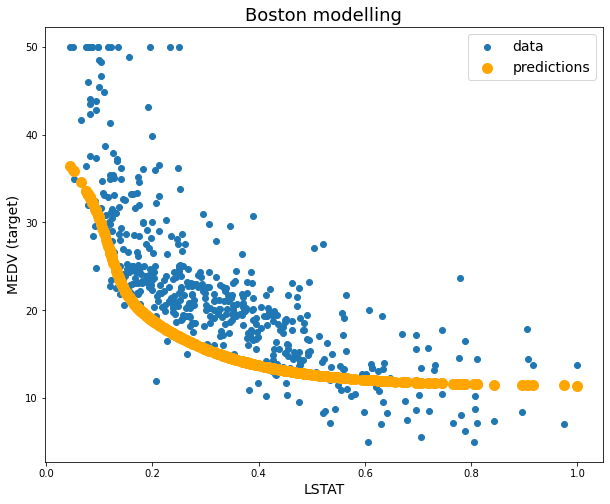

In [ ]:
# Gradient Descend for NN
num_epochs = 100
alpha = 0.05
for i in range(num_epochs):
  L=0
  for n in range(len(x)):
    # Forward
    z = W1*x[n]+b1
    a =  #sigmoid(z)
    o =  #torch.matmul(W2,a)+b2
    
    # Backward
    do =  2*(o-y[n])
    db2 =  #do
    dW2 =  #a.T*do
    db1 =  #W2.T*a*(1-a)*do
    dW1 =  #db1*x[n]

    # Update
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
   
  y_p = torch.zeros_like(y)
  for n in range(len(x)):
    y_p[n] = torch.matmul(W2,(sigmoid(W1*x[n]+b1))) + b2
  clear_output(True)
  plt.figure(figsize=(10,8))
  plt.scatter(x, y, label="data")
  plt.scatter(x, y_p, color="orange", linewidth=5, label="predictions")
  plt.xlabel("LSTAT", fontsize=14)
  plt.ylabel("MEDV (target)", fontsize=14)
  plt.title("Boston modelling", fontsize=18)
  plt.legend(fontsize=14)
  plt.show() 

## NN with PyTorch

In [105]:
import torch.nn as nn

In [106]:
class MyNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MyNN, self).__init__()
    self.hidden_size = hidden_size
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.a1 = nn.Sigmoid()
    #self.fc2 = nn.Linear(hidden_size,hidden_size)
    #self.a2 = nn.ReLU()
    self.fc = nn.Linear(hidden_size,output_size)

  def forward(self, x):
      out = self.fc1(x)
      out = self.a1(out)
      #out = self.fc2(out)
      #out = self.a2(out)
      out = self.fc(out)
      return out


In [107]:
model = MyNN(1,50,1)

In [108]:
criterion = nn.MSELoss()

In [109]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [110]:
num_epochs = 50

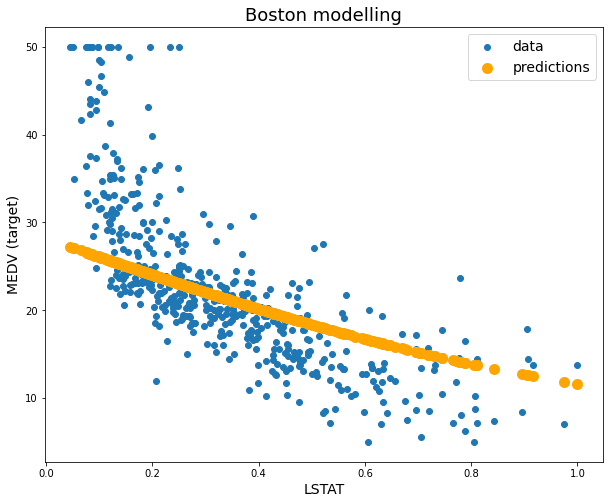

In [111]:
for epoch in range(num_epochs):
  outputs = model(x.unsqueeze(dim=-1))
  loss = criterion(outputs, y.unsqueeze(dim=-1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print(f'epoch {epoch+1} / loss = {loss.item():.4f}')
  
  clear_output(True)
  plt.figure(figsize=(10,8))
  plt.scatter(x, y, label="data")
  plt.scatter(x, outputs.squeeze(dim=-1).data.numpy(), color="orange", linewidth=5, label="predictions")
  plt.xlabel("LSTAT", fontsize=14)
  plt.ylabel("MEDV (target)", fontsize=14)
  plt.title("Boston modelling", fontsize=18)
  plt.legend(fontsize=14)
  plt.show()

## Dataloader in PyTorch

In [112]:
class MyDataset(torch.utils.data.Dataset):
    """
    Our dataset
    """
    def __init__(self, x, y):
        self.x = x/np.max(x)
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx], dtype=torch.float).unsqueeze(dim=-1), torch.tensor(self.y[idx], dtype=torch.float).unsqueeze(dim=-1) 

In [113]:
dataset = MyDataset(boston.data[:,-1], boston.target)

In [114]:
dataset[5]

(tensor([0.1372]), tensor([28.7000]))

In [115]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4) 

In [116]:
next(iter(dataloader))

[tensor([[0.1312],
         [0.2407],
         [0.1061],
         [0.0774]]), tensor([[24.0000],
         [21.6000],
         [34.7000],
         [33.4000]])]

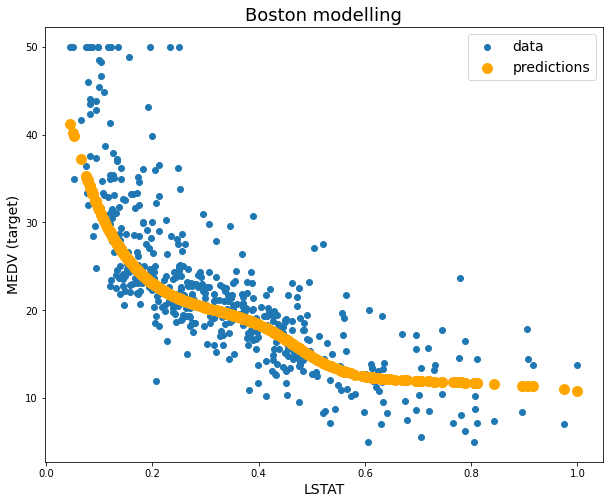

In [117]:
for epoch in range(50):
    for x_train, y_train in iter(dataloader):    
        outputs = model(x_train)                        
        loss = criterion(outputs, y_train)
        loss.backward()                                
        optimizer.step()                               
        optimizer.zero_grad()                          
    
    with torch.no_grad():  
      outputs = model(x.unsqueeze(dim=-1))   
      clear_output(True)
      plt.figure(figsize=(10,8))
      plt.scatter(x, y, label="data")
      plt.scatter(x, outputs.squeeze(dim=-1).data.numpy(), color="orange", linewidth=5, label="predictions")
      plt.xlabel("LSTAT", fontsize=14)
      plt.ylabel("MEDV (target)", fontsize=14)
      plt.title("Boston modelling", fontsize=18)
      plt.legend(fontsize=14)
      plt.show()

# Multidimensional input
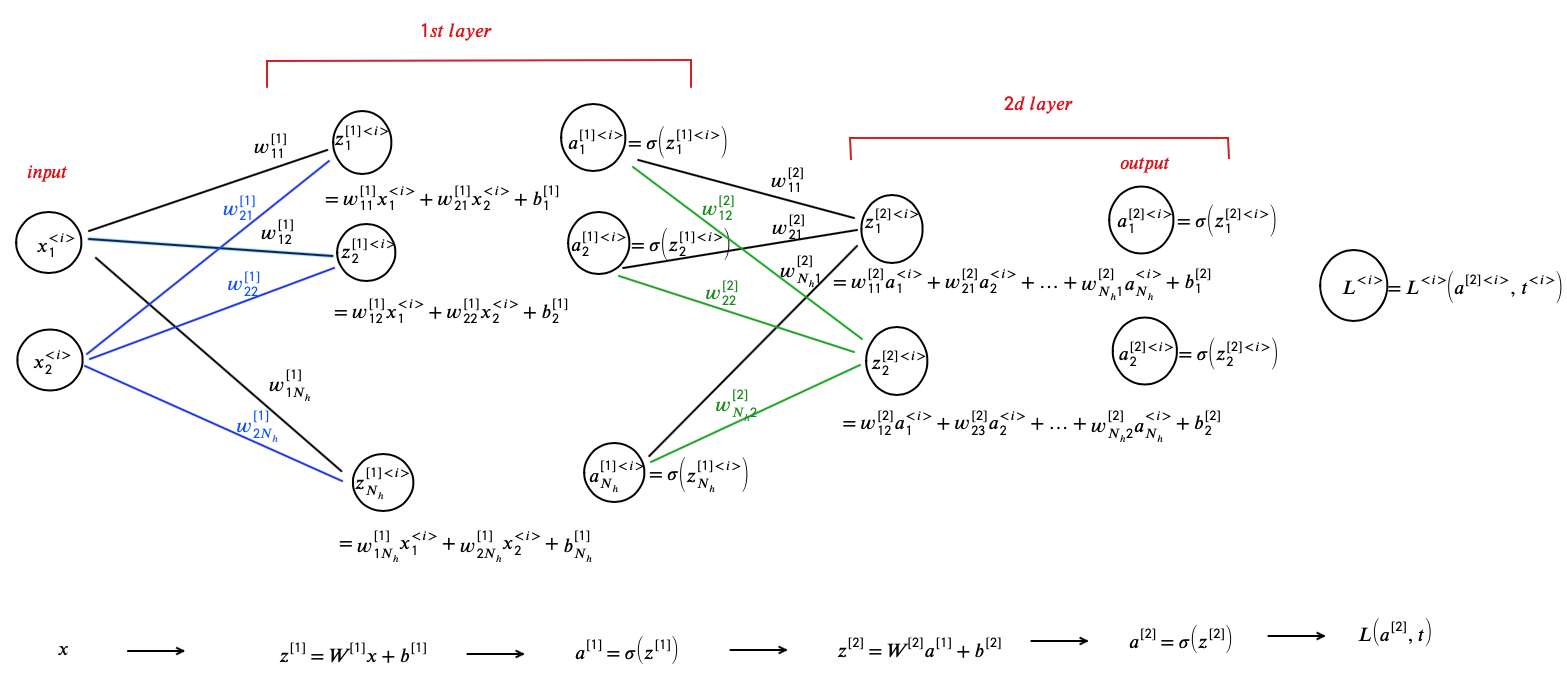
[See figure](https://drive.google.com/uc?id=1HgLaxPutnq-uScjGxf5en5o9R7BCZmOj)

You can try different datasets provided below. You will need to write only Dataset and DataLoader classes the rest of the code is written for you.

In [151]:
N = 200
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
no_structure = np.random.rand(N, 2), np.random.binomial(1,0.5,N)
# multinomial
blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)

In [185]:
X, Y = noisy_moons
X = X.T
Y = Y.reshape(1,-1)
#Y = 2*Y - 1

In [186]:
Y.shape

(1, 200)

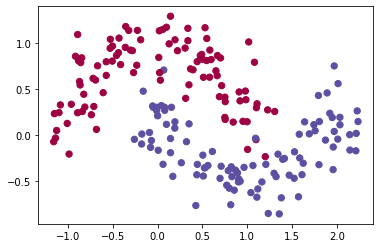

In [187]:
# Visualize the data:
plt.scatter(X[0, :], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral);

Q9. Write the Dataset class

In [188]:
class D2Dataset(torch.utils.data.Dataset):
    """
    Our dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return self.x.shape[1]
    
    def __getitem__(self, idx):
        return #Your code here
        #It should return x[:,idx] as a torch tensor of type float and prediction as array (1, 0) for one class and (0, 1) for the other class, e.g., torch.tensor([1-self.y[0,idx], self.y[0,idx]], dtype=torch.float)

In [189]:
D2data = D2Dataset(X,Y)

In [190]:
D2data[0]

(tensor([-0.8822,  0.8061]), tensor([1., 0.]))

In [191]:
class My2DNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(My2DNN, self).__init__()
    self.hidden_size = hidden_size
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.a1 = nn.Sigmoid()
    #self.fc2 = nn.Linear(hidden_size,hidden_size)
    #self.a2 = nn.ReLU()
    self.fc = nn.Linear(hidden_size,output_size)
    self.o = nn.Softmax()

  def forward(self, x):
      out = self.fc1(x)
      out = self.a1(out)
      #out = self.fc2(out)
      #out = self.a2(out)
      out = self.fc(out)
      out = self.o(out)
      return out


In [192]:
model2D = My2DNN(2,50,2)

Q10. Write the DataLoader

In [193]:
dataloader2D = torch.utils.data.DataLoader(D2data, batch_size=4) 

Because it is a classification task, we use different loss function:

In [194]:
criterion2D = nn.BCELoss()

In [229]:
learning_rate = 0.1
optimizer2D = torch.optim.Adam(model2D.parameters(), lr=learning_rate)

In [230]:
loss_track = []
for epoch in range(20):
    lossepoch = 0
    for x_train, y_train in iter(dataloader2D):    
        outputs = model2D(x_train)                        
        loss = criterion2D(outputs, y_train)
        loss.backward()                                
        optimizer2D.step()                               
        optimizer2D.zero_grad()  
        lossepoch += loss.item()/x_train.shape[0]
    print('epoc %d: loss %f'% (epoch+1, lossepoch))
    loss_track.append(lossepoch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoc 1: loss 0.370559
epoc 2: loss 0.335986
epoc 3: loss 0.358778
epoc 4: loss 0.276283
epoc 5: loss 0.271241
epoc 6: loss 0.262354
epoc 7: loss 0.264359
epoc 8: loss 0.262648
epoc 9: loss 0.263452
epoc 10: loss 0.262601
epoc 11: loss 0.263516
epoc 12: loss 0.261448
epoc 13: loss 0.262195
epoc 14: loss 0.260035
epoc 15: loss 0.260385
epoc 16: loss 0.258693
epoc 17: loss 0.258830
epoc 18: loss 0.258471
epoc 19: loss 0.260680
epoc 20: loss 0.259895


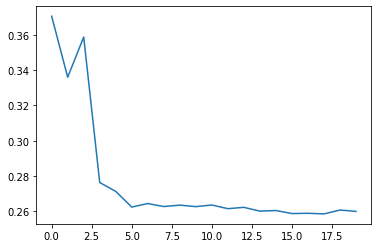

In [231]:
plt.plot(loss_track)

In [232]:
Xp = np.arange(-1.2,2.2,0.1)
Yp = np.arange(-1,1.5,0.1)
x2 = np.zeros((2,len(Xp)*len(Yp)))
for i in range(len(Xp)):
    for j in range(len(Yp)):
        x2[:,i*len(Yp)+j] = np.array([Xp[i], Yp[j]])

In [233]:
with torch.no_grad():
  out = model2D(torch.tensor(x2, dtype=torch.float).T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [234]:
z=out.argmax(dim=1)

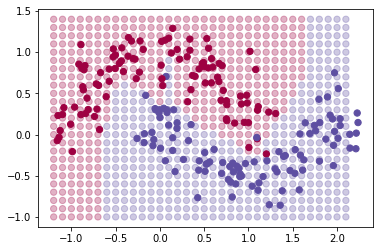

In [235]:
plt.scatter(x2[0, :], x2[1,:], c=z, s=40, alpha = 0.3, cmap=plt.cm.Spectral)
plt.scatter(X[0, :], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)